# WEA FOR NEUTRON SURVIVAL PROBABILITY CALCULATION 

## For solar neutrons through interplanetary space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math as math

In [2]:
En = np.linspace(1, 10000, num=10000) #Enería en MeV
R = 149597870700 #UA en m
m = 939.565560 #Masa en MeV/c**2
c = 299792458 #Velocidad de la luz en m/s
t = 886 #Vida media en s
den = t*c*np.sqrt((((En/m)+1)**2)-1) #Denominador de la ecuación
Ps = np.exp(-(R/den))

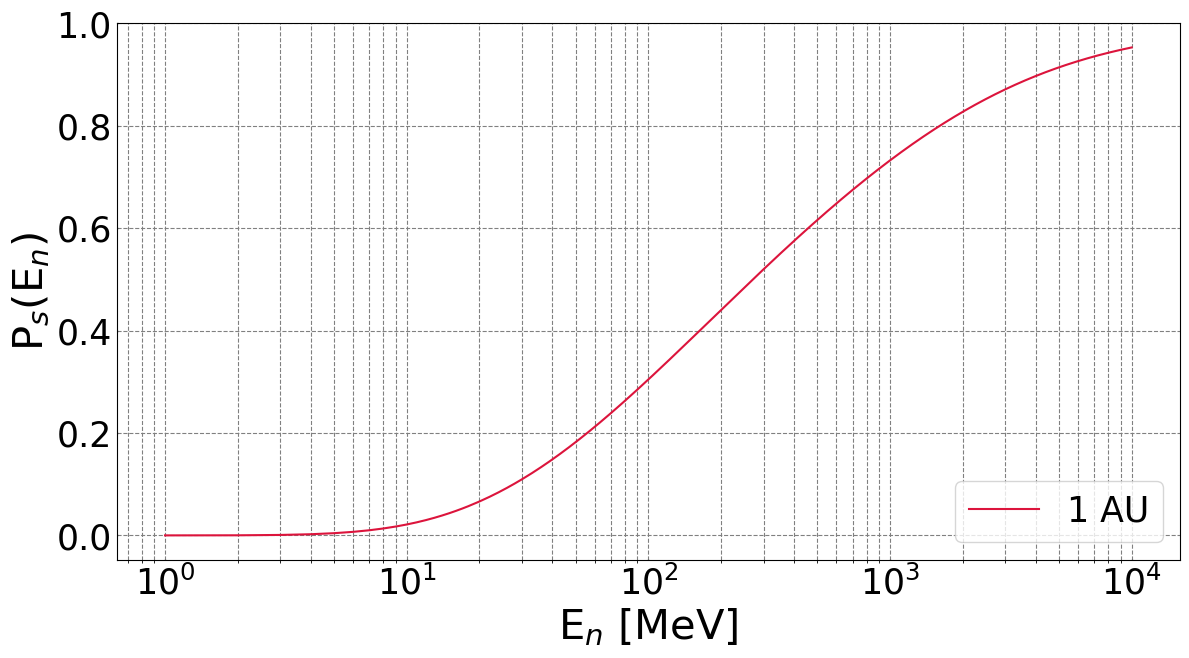

In [4]:
fig = plt.figure(1, figsize=(12,25))
gs = gridspec.GridSpec(4, 1) 
ax1 = plt.subplot(gs[0])

plt.semilogx(En, Ps, linestyle='-', color='crimson')#, label='data-set1')
# plt.semilogx(x_data, y_data+500, marker='s', markersize=10,mfc='white',
#             linestyle='--', label='data-set2')

ax1.tick_params(which = 'major', labelsize = 25, direction = 'in', length = 1, color = 'dimgray', width = 1) #axis = 'both', 
ax1.set_xlabel('E$_{n}$ [MeV]', fontsize = 30)
ax1.set_ylabel('P$_{s}$(E$_{n}$)', fontsize = 30, color= 'black')

# ax1.yaxis.grid(which="major", color='darkgray', linestyle='--', linewidth=1)
# ax1.xaxis.grid(which="major", color='darkgray', linestyle='--', linewidth=1)
plt.grid(True, which="both", color='gray', linestyle='--')
plt.legend(['1 AU'], loc='lower right', fontsize = 25) #, '3\u03C3'
# plt.legend()

fig.tight_layout()
# plt.savefig('survprob', dpi = 'figure', bbox_inches= 'tight')
plt.show()

## For secondary neutrons through Earth's atmosphere

In [69]:
# M3.9 flare case (Monterde-Andrade_2023)
# Scattering cross section may be obtained though several calculations here:
# https://www.ncnr.nist.gov/resources/activation/

En = np.linspace(0.1, 10, num=100) #Enería en MeV
R = 11e3 #r en m
m = 939.565560 #Masa en MeV/c**2
c = 299792458 #Velocidad de la luz en m/s
t = 886 #Vida media en s
den = t*c*np.sqrt((((En/m)+1)**2)-1) #Denominador de la ecuación
art_att = sorted(En +1, reverse = True)
Ps = np.exp(-(R/den))/art_att

In [70]:
Ps

array([0.09090883, 0.09174294, 0.09259244, 0.09345781, 0.0943395 ,
       0.09523798, 0.09615374, 0.09708728, 0.09803912, 0.09900981,
       0.09999991, 0.10101002, 0.10204074, 0.10309271, 0.10416659,
       0.10526308, 0.10638291, 0.10752681, 0.10869558, 0.10989004,
       0.11111104, 0.11235948, 0.1136363 , 0.11494246, 0.116279  ,
       0.11764699, 0.11904755, 0.12048186, 0.12195116, 0.12345673,
       0.12499994, 0.12658222, 0.12820506, 0.12987007, 0.13157888,
       0.13333327, 0.13513507, 0.13698624, 0.13888883, 0.14084501,
       0.14285708, 0.14492747, 0.14705876, 0.14925367, 0.15151509,
       0.15384609, 0.15624994, 0.15873009, 0.16129026, 0.16393436,
       0.1666666 , 0.16949146, 0.17241373, 0.17543853, 0.17857136,
       0.18181811, 0.18518512, 0.18867918, 0.19230762, 0.19607836,
       0.19999993, 0.20408156, 0.20833326, 0.21276588, 0.21739123,
       0.22222214, 0.22727265, 0.23255806, 0.23809516, 0.24390236,
       0.24999992, 0.25641017, 0.26315781, 0.27027018, 0.27777

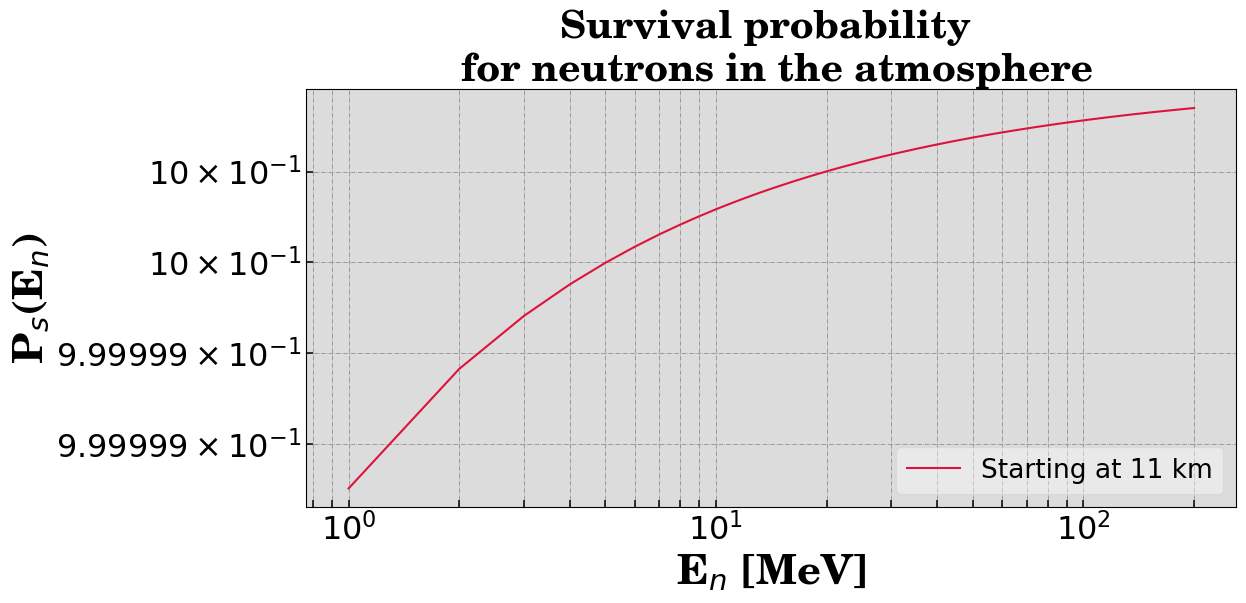

In [30]:
fig = plt.figure(1, figsize=(12,25))
gs = gridspec.GridSpec(4, 1) 
ax1 = plt.subplot(gs[0])
ax1.set_facecolor('gainsboro')

plt.loglog(En, Ps, linestyle='-', color='crimson')

ax1.tick_params(axis = 'both', which = 'both', direction = 'in', 
            labelsize = 23, color = 'k', width = 1.1, length = 5)
ax1.set_xlabel('E$_{n}$ [MeV]', fontweight='bold',
       fontsize = 30, fontname = 'C059')
ax1.set_ylabel('P$_{s}$(E$_{n}$)', fontweight='bold',
       fontsize = 30, fontname = 'C059')
# ax1.set_ylim(0, 1)

plt.title(f'Survival probability \n for neutrons in the atmosphere', fontsize = 28,
      fontweight='bold', color = "black", fontname = 'C059')
plt.grid(True, lw = 0.5, color = 'gray', ls = '-.', which = 'both')
plt.legend(['Starting at 11 km'], loc='lower right', fontsize = 19, framealpha = 0.4) #, '3\u03C3'

# plt.savefig('survprob', dpi = 'figure', bbox_inches= 'tight')
plt.show()